# CNN

## CNN for fashion mnist datasets

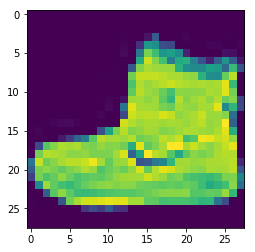

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error

from keras.layers import Dense,Dropout,MaxPool2D,Flatten
from keras.layers.convolutional import Conv2D
from keras.models import Sequential
from keras.callbacks import EarlyStopping

from keras.datasets import fashion_mnist

(X_train,y_train),(X_test,y_test)=fashion_mnist.load_data()

class_names=['T-shirt','Trouser','Pullover','Dress','Coat','Sandal','Shrit','Sneker','Bag','Boot']

plt.imshow(X_train[0])

In [7]:
from keras.utils.np_utils import to_categorical

y_train=to_categorical(y_train)
y_test=to_categorical(y_test)
X_train=X_train.reshape(60000,28,28,1)/255
X_test=X_test.reshape(10000,28,28,1)/255
X_train.shape


(60000, 28, 28, 1)

In [8]:
cnn=Sequential()
cnn.add(Conv2D(filters=16,kernel_size=(3,3),input_shape=(28,28,1),activation='relu'))
cnn.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu'))
cnn.add(MaxPool2D(pool_size=(2,2)))

cnn.add(Flatten()) # flatten banaune kina vane deeep nn le vector matra linxa 

cnn.add(Dense(32,activation='relu'))
cnn.add(Dense(16,activation='relu'))

cnn.add(Dense(10,activation='softmax'))

cnn.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])



Instructions for updating:
Colocations handled automatically by placer.


In [9]:
cnn.fit(X_train,y_train,epochs=9)

Instructions for updating:
Use tf.cast instead.
Epoch 1/9
60000/60000 [==============================] - 58s 973us/step - loss: 0.4773 - acc: 0.8299
Epoch 2/9
60000/60000 [==============================] - 53s 884us/step - loss: 0.3022 - acc: 0.8915
Epoch 3/9
60000/60000 [==============================] - 53s 883us/step - loss: 0.2582 - acc: 0.9056
Epoch 4/9
60000/60000 [==============================] - 53s 891us/step - loss: 0.2292 - acc: 0.9166
Epoch 5/9
60000/60000 [==============================] - 53s 887us/step - loss: 0.2038 - acc: 0.9259
Epoch 6/9
60000/60000 [==============================] - 53s 883us/step - loss: 0.1808 - acc: 0.9342
Epoch 7/9
60000/60000 [==============================] - 53s 888us/step - loss: 0.1630 - acc: 0.9413
Epoch 8/9
60000/60000 [==============================] - 53s 886us/step - loss: 0.1463 - acc: 0.9463
Epoch 9/9
60000/60000 [==============================] - 53s 889us/step - loss: 0.1308 - acc: 0.9524


In [10]:
y_pred=cnn.predict(X_test)

y_pred_class=np.argmax(y_pred,axis=1)
y_test_class=np.argmax(y_test,axis=1)

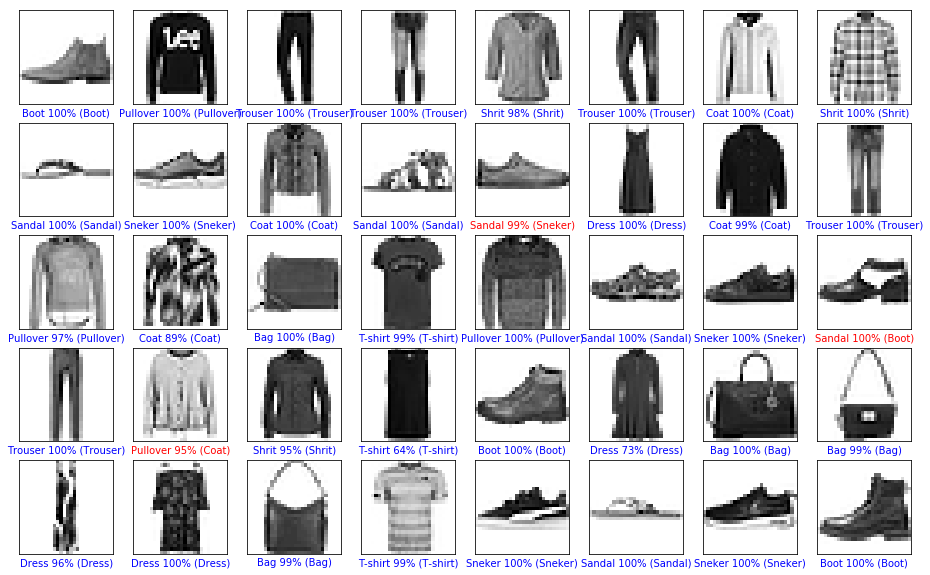

In [11]:
def plot_image(i, y_pred, y_test_class, img):
    y_pred, y_test_class, img = y_pred[i], y_test_class[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(y_pred)
    if predicted_label == y_test_class:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(y_pred),
                                class_names[y_test_class]),
                                color=color)

    
    
num_rows = 5
num_cols = 8
num_images = num_rows*num_cols
plt.figure(figsize=(2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, num_cols, i+1)
    plot_image(i, y_pred, y_test_class, X_test.reshape(10000, 28, 28))
plt.show()    
    

### CNN for Cifar-10 Dataset 

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report,accuracy_score


from keras.layers import Dense,Dropout,Flatten,MaxPool2D,Conv2D
from keras.models import Sequential
from keras.datasets import cifar10
from keras.utils.np_utils import to_categorical

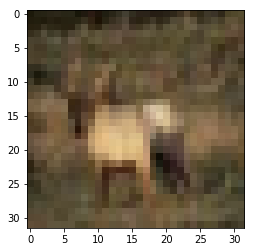

In [13]:
(X_train,y_train),(X_test,y_test)=cifar10.load_data()

class_labels=['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

plt.imshow(X_train[3])

In [14]:
class_labels[int(y_train[3])]

'deer'

In [15]:
X_train.shape

## aba normalizze garne nagarda nee hunxa but faster computation ko laagi 

X_train=X_train/255
X_test=X_test/255

from keras.callbacks import ModelCheckpoint

y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

y_train


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [17]:
cnn=Sequential()

#block1
cnn.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=(32,32,3),activation='relu',padding="same"))
cnn.add(Conv2D(48,(3,3),activation='relu'))
cnn.add(MaxPool2D(pool_size=(2,2)))
cnn.add(Dropout(0.20))

#block2
cnn.add(Conv2D(32,(3,3),activation='relu'))
cnn.add(Conv2D(24,(3,3),activation='relu'))
cnn.add(MaxPool2D(pool_size=(2,2)))
cnn.add(Dropout(0.20))



#FC layers

cnn.add(Flatten())
cnn.add(Dense(24,activation='relu'))
cnn.add(Dropout(0.20))
cnn.add(Dense(14,activation='relu'))
cnn.add(Dropout(0.20))

cnn.add(Dense(10,activation='softmax'))

cnn.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])



In [18]:
cnn.fit(X_train,y_train,epochs=2)

Epoch 1/2
50000/50000 [==============================] - 305s 6ms/step - loss: 1.8948 - acc: 0.2818
Epoch 2/2
50000/50000 [==============================] - 298s 6ms/step - loss: 1.5722 - acc: 0.4208


In [19]:
cnn.evaluate(X_test,y_test)


10000/10000 [==============================] - 18s 2ms/step


[1.3179438817977904, 0.5328]

### 1D CNN Model for IMDB datasets(PREDICT SENTIMENT)

In [20]:
# CNN for the IMDB problem
import numpy
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

In [21]:
# load the dataset but only keep the top n words, zero the rest
top_words = 5000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=top_words)
# pad dataset to a maximum review length in words
max_words = 500
X_train = sequence.pad_sequences(X_train, maxlen=max_words)
X_test = sequence.pad_sequences(X_test, maxlen=max_words)

In [22]:
# create the model
model = Sequential()
model.add(Embedding(top_words, 32, input_length=max_words))
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(250, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 500, 32)           160000    
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 500, 32)           3104      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 250, 32)           0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 8000)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 250)               2000250   
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 251       
Total params: 2,163,605
Trainable params: 2,163,605
Non-trainable params: 0
_________________________________________________________________


In [23]:
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=2, batch_size=128, verbose=2)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Train on 25000 samples, validate on 25000 samples
Epoch 1/2
 - 26s - loss: 0.4795 - acc: 0.7383 - val_loss: 0.2809 - val_acc: 0.8842
Epoch 2/2
 - 24s - loss: 0.2233 - acc: 0.9121 - val_loss: 0.2760 - val_acc: 0.8841
Accuracy: 88.41%
